**João Castanheira 55052 | Gustavo Fonseca 55054**

# Data Mining / Prospecção de Dados

## Sara C. Madeira, 2019/20

# Project 3 - Classification/Regression

## Logistics

**In a "normal" scenario students should work in teams of 2 people. Due to the social distance imposed by current public health situation, students were allowed to work in groups of 1 and 3. In this context, the amount of work was adapted according to the number of students in groups as described below.**

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 2, 3 and 4**  for groups of 1, 2 and 3 students, respectively.
    * In Task **4**, groups of 1, 2 and 3 students should try 1, 2 and 3 ensemble approaches, respectively.

The quality of the project will then dictate its grade.

**The project's solution should be uploaded in Moodle before the end of June, 9th 2020 (23:59).** 

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. Note that you can use `PD_201920_Project3.ipynb`as template.**

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions should be justified and results should be critically discussed.**

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`ModifiedHousePrices.csv`**, a modified version of the train dataset used in Kaggle's competition ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

If you ask a home buyer to describe their dream house, they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With more than 70 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the price, and a
2. **Classification Task**: predict a price category.

The variables are described [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

The targets are:
1. `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict in the regression task (same as in the Kaggle challenge).
2. `Price3Classes` - the price category, where price can be below 200000 ("<200000"), between 200000 and 400000 ("[200000,400000]"), or above 200000 (">200000"). This is the target variable that you're trying to predict in the classification task. 

# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#import smogn
import os
from imblearn.combine import SMOTETomek
from scipy import stats
from scipy.stats import norm

## 1. Load and Preprocess Dataset

In [3]:
df_data = pd.read_csv('data/ModifiedHousePrices.csv')
df_data.shape

(1460, 82)

In [4]:
df_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Price3Classes
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,"[200000,400000]"
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,<200000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,"[200000,400000]"
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,<200000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,"[200000,400000]"


## 1.1. Exploratory Data Analysis

In this section we will explore the dataset by analysing some of its features. We will start by analyse the distribution of the the target variables, both for the regression and for the classification task, and then we will do a some exploratory data analysis to the other features in order to analyse the missing values.

### 1.1.1 Continuous Variable - SalePrice

Text(0.5, 0, 'Price')

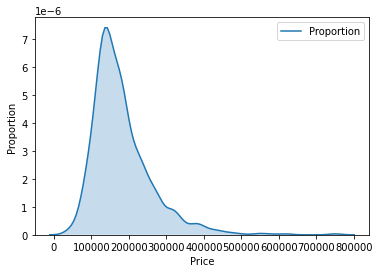

In [5]:
sns.kdeplot(df_data['SalePrice'], shade=True)
plt.legend(['Proportion'])
plt.ylabel('Proportion')
plt.xlabel('Price')

Above we can see the distribution of prices in a KDE plot which is a non-parametric way to estimate the probability density function of the price of each house.

### 1.1.2. Categorical Variable - Price3Classes

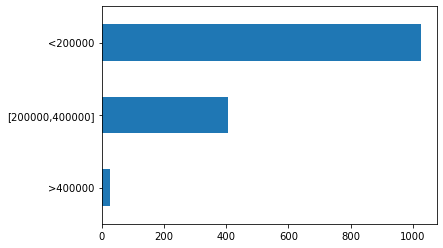

In [5]:
df_data.Price3Classes.value_counts().sort_values().plot(kind = 'barh')

The above bar plot shows the distribution of prices by 3 classes.
We can see that we have an unbalanced dataset for the classification task.

### 1.1.3. Feature Exploration

Bellow we will define two vectors that saves the categorical and continuous variables that we identified by analysing the dataset. 

In [7]:
cat_var = [
    'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'MoSold',
    'SaleType',
    'SaleCondition'
]

num_var = [
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',    
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'YrSold',
]

Now lets create a dataframe with information about the columns of the dataset. The dataframe have the following columns:

+ column: indicates the columns name;
+ type: indicates if the column is categorical or continuous
* data_type: the data type of the column;
* max: if the column is a continuous variable, the maximum of that column;
* min: if the column is a continuous variable, the minimum of that column;
* mean: if the column is a continuous variable, the mean of that column;
* std: if the column is a continuous variable, the standard deviation of that column;
* nulls_count: the number of records with that column being null;
* nulls_percentage: the percentage of nulls of that column;
* unique_count: the number of unique rows;
* zero_count: the number of records with zero.

In [8]:
all_columns = cat_var + num_var
template_df = list()

df_var_columns = [
    'column',
    'type',
    'data_type',
    'max',
    'min',
    'mean',
    'std',
    'nulls_count',
    'nulls_percentage',
    'unique_count',
    'zero_count',
]

for s in all_columns:
    template_df.append([s]+['']*(len(df_var_columns)-1))

df_variables_info = pd.DataFrame(template_df, columns=df_var_columns).set_index('column')

In [9]:
empty_df = []
total_rows = len(df_data)

for s in df_data.loc[:,'MSSubClass':'SaleCondition'].columns:

    nullable_values = len(df_data[s][df_data[s].isnull()])
    df_variables_info.loc[s, 'nulls_count'] = nullable_values
    df_variables_info.loc[s, 'nulls_percentage'] = (nullable_values/total_rows) * 100
    df_variables_info.loc[s, 'data_type'] = df_data[s].dtype
    df_variables_info.loc[s, 'unique_count'] = len(df_data[s].unique())
    #add column zero_count for features with dtype int64 or float64
    if (df_data[s].dtype == np.int64) | (df_data[s].dtype == np.float64) : 
        df_variables_info.loc[s, 'zero_count'] = len(df_data[df_data[s] == 0])
    if s in cat_var: df_variables_info.loc[s, 'type'] = 'categorical'
    elif s in num_var: 
        df_variables_info.loc[s, 'type'] = 'numerical'
        df_describe = df_data[s].describe().to_frame()
        df_variables_info.loc[s, 'mean'] = df_describe.loc['mean',s]
        df_variables_info.loc[s, 'std'] = df_describe.loc['std',s]
        df_variables_info.loc[s, 'min'] = df_describe.loc['min',s]
        df_variables_info.loc[s, 'max'] = df_describe.loc['max',s]
df_variables_info = df_variables_info.reset_index()

Now lets do some analysis based on the dataframe defined above.

Lets explore the type of features that the dataset has.

Text(0.5, 1.0, 'Types of columns')

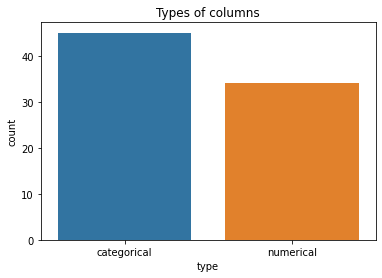

In [10]:
df_graph = df_variables_info.groupby('type').size().to_frame('count').reset_index()
sns.barplot(x='type',y='count', data = df_graph)
plt.title('Types of columns')

We can see that we have more categorical columns than numerical.

Now lets plot the percentage of nulls for each column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

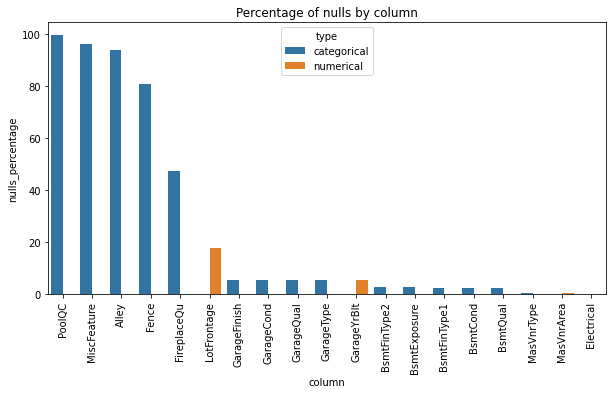

In [11]:
#get just columns with null values
df_graph = df_variables_info[df_variables_info['nulls_percentage']> 0].sort_values('nulls_percentage',ascending = False)
#plot them
plt.figure(figsize=(10,5))
sns.barplot(x='column', y = 'nulls_percentage', hue='type', data = df_graph)
plt.title('Percentage of nulls by column')
plt.xticks(rotation=90)

We can see that we have 5 categorical columns with with more than 50% of nulls, and just 3 continuous features with missing values.

Now lets analyse the amount of zeros by continuous column

/home/gustavosf/Documents/GitHub/DataMining-Project-3/dm-ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

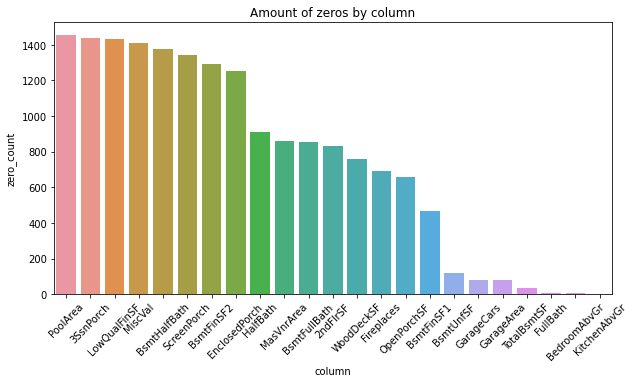

In [12]:
df_graph = df_variables_info[(df_variables_info['type'] == 'numerical') & (~df_variables_info['zero_count'].isnull())]
df_graph['zero_count'] = df_graph['zero_count'].astype(int)
df_graph = df_graph[df_graph['zero_count']>0].sort_values('zero_count',ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x='column',y='zero_count', data = df_graph)
plt.title('Amount of zeros by column')
plt.xticks(rotation=45)

In [13]:
df_data['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

We have some features with a huge amount of zeros, but we consider that those features could be important in order to describe our target variables (the price of the house). For example, the feature PoolArea has most of its values being zero, but it is useful to describe the price of the houses so we will leave as it is, because a house without a pool is generally less expensive.

## 1.2. Missing Values inputation

One of the most common problems in a data science project is handling missing values. First, it is important to note that there is no general solution to deal with missing data. It depends on the task we are solving and on the amount and quality of data we have.

For this task, we decided to analyse missing values of continuous and categorical features. For continuous values we will analyse the features distribution to check if it makes sense to impute the **mean** for the missing values.

### Continuous features

Numerical valued columns with missing values are:
+ Linear feet of street connected to property (LotFrontage), with almost 20% of nulls.
+ Masonry veneer area in square feet (MasVnrArea), with around 0.5% of nulls, just 8 records.
+ Year the garage was built (GarageYrBlt), with around 5.5% of nulls.

Bellow we define a function that will be used in order to analyse the feature distribution of those features.

In [14]:
def feature_dist(df, column_name):
    """"""
    plt.figure(figsize=(15,4))
    sns.distplot(df[column_name] , fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[column_name])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(column_name))
    plt.show()

Lets analyse the distribution of 'LotFrontage' feature.

Records with missing values: 259

 mu = 70.05 and sigma = 24.27



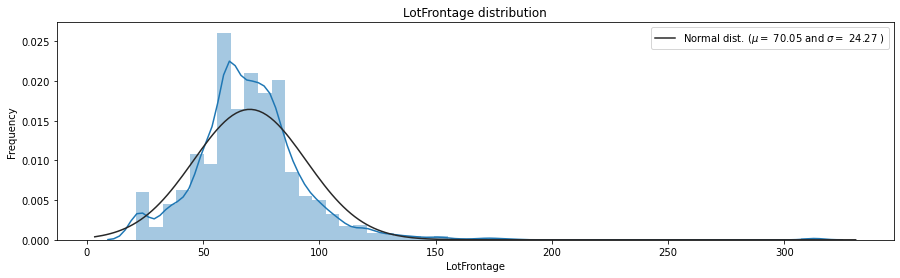

In [15]:
print('Records with missing values: {}'.format(len(df_data[df_data['LotFrontage'].isnull()])))
df_graph = df_data[df_data['LotFrontage']>=0]
feature_dist(df_graph, 'LotFrontage')

By analysing the graph above we can see that the feature distribution is similar to a gaussian distribution, with a mean of 70.05 and a standard deviation of 24.27. Because of that, we decided to impute the mean to the missing values.

In [16]:
df_lotfrontagenulls = df_data[df_data['LotFrontage'].isnull()]
m = df_data['LotFrontage'].mean()
for i, r in df_lotfrontagenulls.iterrows():
    df_data.loc[i,'LotFrontage'] = m

Now lets analyse the distribution of 'MasVnrArea' feature.

Records with missing values: 8

 mu = 103.69 and sigma = 181.00



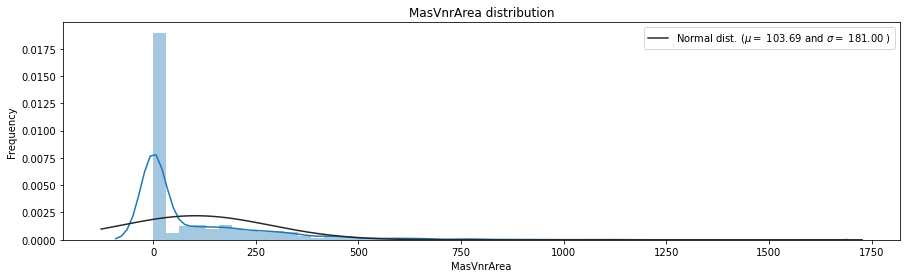

In [17]:
print('Records with missing values: {}'.format(len(df_data[df_data['MasVnrArea'].isnull()])))
df_graph = df_data[df_data['MasVnrArea']>=0]
feature_dist(df_graph, 'MasVnrArea')

We can see that this feature does not have a gaussian distribution, so imputing the mean could not be a good solution for it. By analysing the dataset description in [1], we can see that 'MasVnrArea' is related to 'MasVnrType'. Lets analyse the information that we have about those features.

In [18]:
df_variables_info[(df_variables_info['column'] == 'MasVnrType') | (df_variables_info['column'] == 'MasVnrArea')]

,column,type,data_type,max,min,mean,std,nulls_count,nulls_percentage,unique_count,zero_count
18,MasVnrType,categorical,object,,,,,8,0.547945,5,
51,MasVnrArea,numerical,float64,1600,0,103.685,181.066,8,0.547945,328,861


In [19]:
df_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We can see that 'MasVnrType' is categorical and can assume 4 possible values. By analysing the dataframe 'df_variables_info' that we created, with information about the features, we can observe that both the two features have 8 nulls. Lets check if those 8 records are the same.

In [20]:
df_data[df_data['MasVnrType'].isnull()].index.values, df_data[df_data['MasVnrArea'].isnull()].index.values

(array([ 234,  529,  650,  936,  973,  977, 1243, 1278]),
 array([ 234,  529,  650,  936,  973,  977, 1243, 1278]))

We can see that when 'MasVnrType' is null, 'MasVnrArea' is null as well. By analysing the 4 possible values that the 'MasVnrType' could have, we decided to impute 'None' to 'MasVnrType' and 0 to 'MasVnrArea' for the missing values.

In [21]:
for i in df_data[df_data['MasVnrType'].isnull()].index.values:
    df_data.loc[i,'MasVnrType'] = 'None'
    df_data.loc[i,'MasVnrArea'] = 0

Now lets explore the 'GarageYrBlt' feature distribution

Records with missing values: 81

 mu = 1978.51 and sigma = 24.68



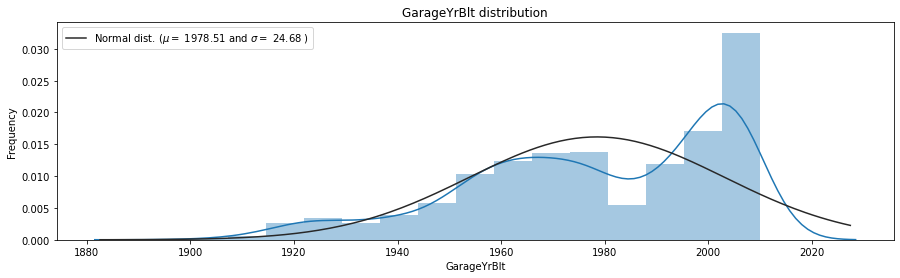

In [22]:
print('Records with missing values: {}'.format(len(df_data[df_data['GarageYrBlt'].isnull()])))
df_graph = df_data[df_data['GarageYrBlt']>=0]
feature_dist(df_graph, 'GarageYrBlt')

The feature has a mean around 1980 and a standard deviation of 25. We could assign the missing values with the mean of the feature, but we decided to assign it with the same value in 'YearBuilt', which represents the year that the house was built. This prevent us from having cases were GarageYrBlt < YearBuilt

In [23]:
df_garageyearnulls = df_data[df_data['GarageYrBlt'].isnull()]
for i, r in df_garageyearnulls.iterrows():
    df_data.loc[i,'GarageYrBlt'] = r.YearBuilt

### Categorical Features

Categorical columns with missing values are a lot more, they include:
+ Type of alley access (Alley)
+ Masonry veneer type (MasVnrType)
+ Height of the basement (BsmtQual)
+ General condition of the Basement (BsmtCond)
+ Walkout of garden level basement walls (BsmtExposure)
+ Quality of basement finished area (BsmtFinType1)
+ Quality of second finished area (BsmtFinType2)
+ Electrical System (Electrical)
+ Fireplace quality (FireplaceQu)
+ Garage location (GarageType)
+ Interior finish of the garage (GarageFinish)
+ Garage quality (GarageQual)
+ Garage condition (GarageCond)
+ Pool quality (PoolQC)
+ Fence quality (Fence)
+ Miscellaneous feature not covered in other categories (MiscFeature)

Bellow we have a graph that identify the percentage of nulls in the categorical variables. As we can see by looking to the graph, the first 5 columns have most of their values being null. We decided to remove that first 5 columns from the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

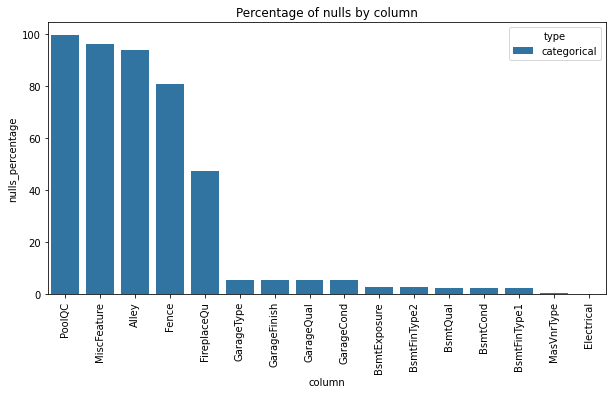

In [24]:
#get just columns with null values
df_graph = df_variables_info[(df_variables_info['nulls_percentage']> 0)&(df_variables_info['type']=='categorical')].sort_values('nulls_percentage',ascending = False)
#plot them
plt.figure(figsize=(10,5))
sns.barplot(x='column', y = 'nulls_percentage', hue='type', data = df_graph)
plt.title('Percentage of nulls by column')
plt.xticks(rotation=90)

In [25]:
cols_to_remove = [
    'PoolQC',
    'MiscFeature',
    'Alley',
    'Fence',
    'FireplaceQu'
]
for c in cols_to_remove: df_data.drop(c, axis=1, inplace=True)

For the other categorical columns we will input 'unknown' since it is impossible to know if the missing data was forgotten to be added or if it was just because it was not applicable. Beside that, these remaining categorical features have few values 

In [26]:
cat_var2 = np.setdiff1d(cat_var,cols_to_remove)
# yields the elements in `list_2` that are NOT in `list_1`
df_data[cat_var2] = df_data[cat_var2].fillna('unknown')

## Features Encoding

In this section we will encode the categorical features. We decided to use leave one out encoding strategy for the features, and the label encoder for the target (classification task)

Bellow we define a function that gets the data for the machine learning task.

In [27]:
def get_data(df, features=None, regression=True):
    """Creates data.
    
    Parameters:
        df (DataFrame): table with rows and columns
        features (Index, Series, list): vector of column names to include in data
        binary (bool): choose which target values to use
    
    Returns:
        ndarray: matrix of features values
        ndarray: vector of target values
        ndarray, Index, list: vector of feature names
        string: target name
    
    """
    if features is None: 
        features = df.columns.tolist()
    
    # guarantee that target features are not included
        features.remove('Id')
        features.remove('Price3Classes')
        features.remove('SalePrice')
    
    X = df[features]
    
    if regression == True:
        y = df[['SalePrice']]
        target = 'SalePrice'
    else:
        y = df[['Price3Classes']]
        target = 'Price3Classes'
    
    return X, y, features, target

In [28]:
df_X, df_y_reg, features, target_r = get_data(df_data, regression=True)
df_X, df_y_cat, features, target_c = get_data(df_data, regression=False)
df_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


Encode the target variable by using Label Encoder.

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_y_cat_enc = le.fit(df_y_cat)
df_y_cat_enc = le.transform(df_y_cat)
df_y_cat_enc

/home/gustavosf/Documents/GitHub/DataMining-Project-3/dm-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([2, 0, 2, ..., 2, 0, 0])

Encode the categorical features by using Leave One Out Encoder.

In [30]:
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(cols = cat_var2)
encoder.fit(df_X, df_y_cat_enc)
df_X_encoded = encoder.transform(df_X)
df_X_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.163880,0.654214,65.0,8450,0.577717,0.422703,0.559878,0.577108,0.543726,0.563676,...,61,0,0,0,0,0,0.653846,2008,0.519337,0.534224
1,0.615672,0.654214,80.0,9600,0.577717,0.422703,0.559878,0.577108,0.468085,0.563676,...,0,0,0,0,0,0,0.539216,2007,0.519337,0.534224
2,1.163880,0.654214,68.0,11250,0.577717,0.832645,0.559878,0.577108,0.543726,0.563676,...,42,0,0,0,0,0,0.793651,2008,0.519337,0.534224
3,0.466667,0.654214,60.0,9550,0.577717,0.832645,0.559878,0.577108,0.596958,0.563676,...,35,272,0,0,0,0,0.653846,2006,0.519337,0.267327
4,1.163880,0.654214,84.0,14260,0.577717,0.832645,0.559878,0.577108,0.468085,0.563676,...,84,0,0,0,0,0,0.847458,2008,0.519337,0.534224


## Train Test Split

So far the changes we did were transforming the data in order to be used. Now we will do a train test split in order to conserve a part of the data before balancing and doing a feature selection.

In [88]:
from sklearn.model_selection import train_test_split

# Categorical Train Test split

df_X_encoded_cat_train, df_X_cat_encoded_test, df_y_cat_enc_train, df_y_cat_enc_test = train_test_split(df_X_encoded, df_y_cat_enc, test_size=0.1, random_state=42)

# Regression Train Test split

df_X_encoded_reg_train, df_X_reg_encoded_test, df_y_reg_train, df_y_reg_test = train_test_split(df_X_encoded, df_y_reg, test_size=0.1, random_state=42)

## Balancing data

As we have seen in the previous section we have an unbalanced dataset for the classification task. We will use SMOTETomek strategy in order to balance our dataset.

dataset size: 1314


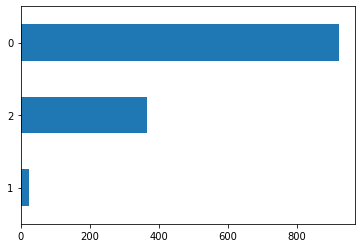

In [90]:
print('dataset size: {}'.format(len(df_X_encoded_cat_train)))
pd.DataFrame(df_y_cat_enc_train, columns = [target_c])[target_c].value_counts().sort_values().plot(kind = 'barh')

In [91]:
smt = SMOTETomek(random_state=1)
df_X_encoded_balanced, y_cat_enc_balanced = smt.fit_resample(df_X_encoded_cat_train, df_y_cat_enc_train)

dataset size: 2755


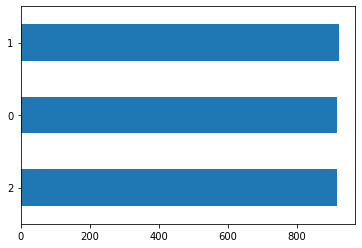

In [92]:
print('dataset size: {}'.format(len(df_X_encoded_balanced)))
pd.DataFrame(y_cat_enc_balanced, columns = [target_c])[target_c].value_counts().sort_values().plot(kind = 'barh')

We can see that after applying the SMOTETomek algorithm, our dataset increases from 1314 records to 2755 records. It was supposed to do both oversampling and undersampling, but as we have seen the algorithm prefered to just do an oversampling, which might be because Tomek undersampling was not so useful for this dataset.

## 1.3. Feature Selection

As the number of features increases, the model becomes more complex. The more the number of features, the more the chances of overfitting. A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on and in turn becomes overfitted, resulting in poor performance on real data, beating its purpose.

We therefore do a dimensionality reduction. In order to do that, we will use a Random Forest to obtain the feature_importances. Then we will select the top 20 most important features according to the Random Forest

#### For Regression

For regression we will use a random forest regressor

In [93]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(df_X_encoded_reg_train, df_y_reg_train)

/home/gustavosf/Documents/GitHub/DataMining-Project-3/dm-ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=1)

Text(0, 0.5, 'Importance')

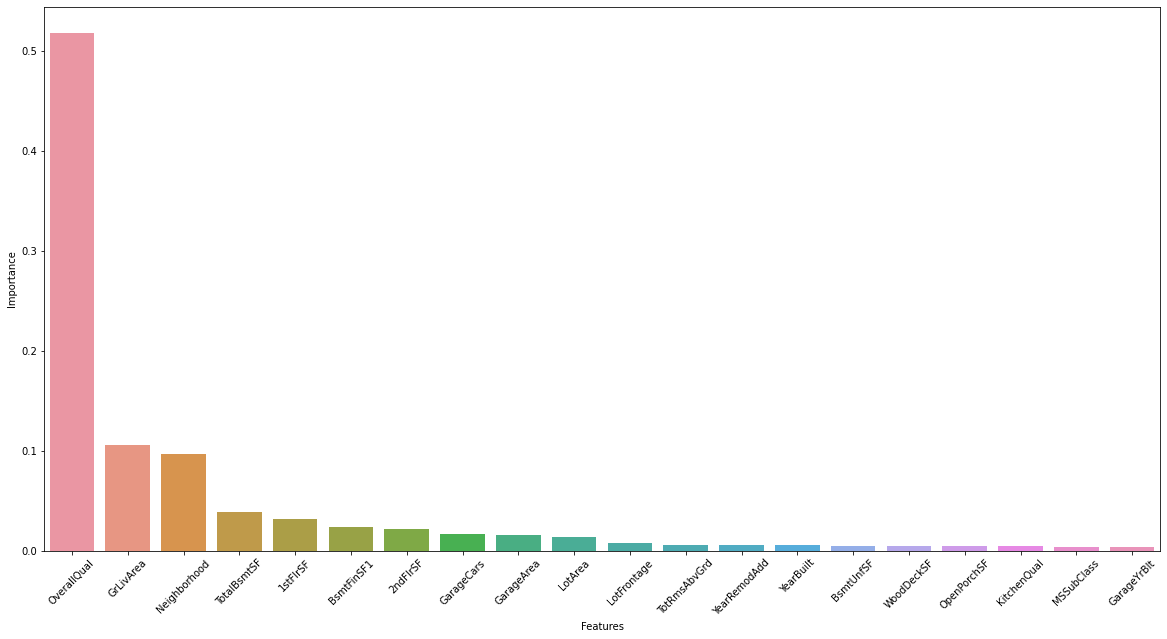

In [96]:
importance_df_reg = pd.DataFrame(np.vstack((df_X_encoded_reg_train.columns,model.feature_importances_))).T.sort_values(1, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=importance_df_reg.iloc[:20,:], x=0, y=1)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')

In [97]:
importance_df_reg.iloc[:20][1].sum()

0.9337457222678124

In [98]:
# Saving the column for Regression analysis
reg_columns = importance_df_reg[0].head(20).values.tolist()

For the regression classification task we will use the 20 features that random forest regression gave more importance. We can see that the random forest regressor gives much more importance to the feature 'OverallQual' compared to the others. This makes sense because this feature rates the overall material and finish of the house.

#### For Classification

For classification we will use a random forest classifier

In [99]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(df_X_encoded_balanced, y_cat_enc_balanced)

RandomForestClassifier(random_state=1)

Text(0, 0.5, 'Importance')

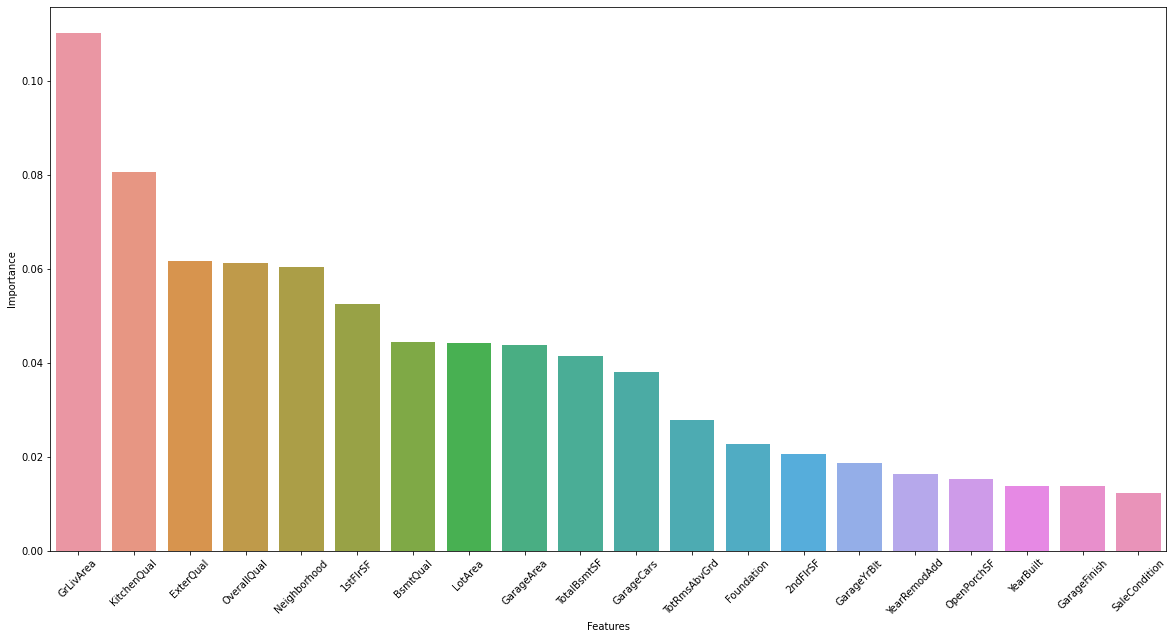

In [100]:
importance_df_clf = pd.DataFrame(np.vstack((df_X_encoded_balanced.columns,model.feature_importances_))).T.sort_values(1, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=importance_df_clf.iloc[:20,:], x=0, y=1)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')

In [101]:
importance_df_clf.iloc[:20][1].sum()

0.800148807793196

In [102]:
# Saving the column for Classification analysis
clf_columns = importance_df_clf[0].head(20).values.tolist()

For the classification task we will use the 20 features present in the graph above. Compared to the feature_importance outputed by the random forest regressor, we can see that in this case  there is no single feature that have much more importance compared to the others. Instead, we have a bunch of features with some importance. The top 20 features selected have an importance of 0.81 in [0,1], which we assume that is sufficient in order to describe our target variable.

## Critical assessment of preprocessing 

In this project the preprocessing steps taken were the following:

* Missing value inputation;
* Features encoding with 'Leave one out' strategy and target encoding with 'Label Encoding';
* Feature selection for both classification and regression taks with random forests feature_importance. 

We could test many other stratagies for the pre processing. We didn't test other preprocessing strategies because we tougth that it leaves the scope of the project.

For the **missing values** step, we could for instance explore in more depth the categorical features in order to find other ways to impute the missing values, in spite of imputing it with 'unknown'. For that we should have analysed the features and their correlation with other features in order to understand the meaning of the features in the context of the task, and how they correlate with other features. With that information we could decide another strategy rather than simple imputing 'unknown'. Another strategy that could be adopted is imputing the most probable value by using some inference-based tools such as a bayesian formalist or a decision tree induction. Altougth this is a more complex method, it is also one of best methods as it used most of the information already presented to predict the missing values [3].

For the **feature encoding** we decided to use the 'Leave one out' strategy instead of one hot enconding in order to keep the feature information. By keeping the feature information we can then use random forest in order to get the more important features. Besides that, we could have tested other encoding strategies such as one hot encoding.

For the **feature selection** phase we used random forest in order to get the feature importance. This could be biased because random forest tend to gives more importance to high cardinality features, even if they are uninformative compared to variables with less categories [2]. Because of that we could have tested other approaches such as recursive feature selection or principal component analysis.

We didn't adopt any technique to deal with **noisy data** that could exist in the dataset. Lets see the data that we have, by selecting just the features that will be used for both the classification and regression task, chosen by the random forest.

For the classification task:

In [103]:
df_x_clf, y_clf = df_X_encoded_balanced[clf_columns], y_cat_enc_balanced
df_x_clf

,GrLivArea,KitchenQual,ExterQual,OverallQual,Neighborhood,1stFlrSF,BsmtQual,LotArea,GarageArea,TotalBsmtSF,GarageCars,TotRmsAbvGrd,Foundation,2ndFlrSF,GarageYrBlt,YearRemodAdd,OpenPorchSF,YearBuilt,GarageFinish,SaleCondition
0,2057,1.022184,1.245902,7,1.058824,1020,0.894822,11500,180,1017,1,6,0.228707,1037,1936.000000,1987,0,1936,1.051136,0.534224
1,1430,1.022184,1.245902,7,0.966667,1430,0.894822,16285,605,1413,2,6,1.029366,0,2001.000000,2002,33,2001,0.836493,0.534224
2,768,0.117007,0.169978,5,0.966667,768,0.894822,7200,396,768,1,5,0.228707,0,1974.000000,2003,0,1972,1.051136,0.534224
3,864,0.117007,0.169978,3,0.100000,864,0.146379,8248,0,864,0,5,0.171233,0,1914.000000,1950,0,1914,0.049383,0.534224
4,1180,0.051282,0.169978,4,1.058824,1180,0.114286,11600,252,700,1,5,0.171233,0,1922.000000,1950,0,1922,0.190083,0.534224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,1837,1.540919,1.495628,8,1.368421,1837,1.570248,14596,765,1837,3,7,1.029366,0,2005.931184,2005,68,2005,1.051136,0.534224
2751,2207,1.022184,1.245902,7,1.002764,1198,0.894822,11119,584,1185,1,9,0.693244,1009,1972.231531,2002,0,1972,0.190083,0.534224
2752,1655,1.022184,1.245902,8,1.221437,1655,0.894822,11096,826,1655,3,7,1.029366,0,2006.000000,2006,145,2006,0.836493,0.534224
2753,2191,1.022184,1.245902,7,1.010073,1208,0.894822,11093,544,1197,1,9,0.625182,982,1966.203656,2002,0,1966,0.190083,0.534224


We will also select the same columns in the test data

In [107]:
df_x_clf_test, y_clf_test = df_X_cat_encoded_test[clf_columns], df_y_cat_enc_test

For the regression task:

In [109]:
df_x_reg, y_reg = df_X_encoded_cat_train[reg_columns], df_y_reg_train
df_x_reg_test, y_reg_test = df_X_reg_encoded_test[reg_columns], df_y_reg_test
df_x_reg

,OverallQual,GrLivArea,Neighborhood,TotalBsmtSF,1stFlrSF,BsmtFinSF1,2ndFlrSF,GarageCars,GarageArea,LotArea,LotFrontage,TotRmsAbvGrd,YearRemodAdd,YearBuilt,BsmtUnfSF,WoodDeckSF,OpenPorchSF,KitchenQual,MSSubClass,GarageYrBlt
907,7,2057,1.058824,1017,1020,223,1037,1,180,11500,86.0,6,1987,1936,794,0,0,1.022184,0.243056,1936.0
782,7,1430,0.966667,1413,1430,0,0,2,605,16285,67.0,6,2002,2001,1413,0,33,1.022184,0.615672,2001.0
952,5,768,0.966667,768,768,660,0,1,396,7200,60.0,5,2003,1972,108,192,0,0.117007,0.000000,1974.0
620,3,864,0.100000,864,864,41,0,0,0,8248,45.0,5,1950,1914,823,0,0,0.117007,0.000000,1914.0
669,4,1180,1.058824,700,1180,0,0,1,252,11600,80.0,5,1950,1922,700,0,0,0.051282,0.000000,1922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,1314,0.966667,1314,1314,24,0,2,440,9317,78.0,6,2006,2006,1290,0,22,1.022184,0.615672,2006.0
1130,4,1981,0.080000,1122,1328,622,653,2,576,7804,65.0,7,1950,1928,500,431,44,1.022184,0.243056,1981.0
1294,5,864,0.100000,864,864,167,0,2,572,8172,60.0,5,1990,1955,697,0,0,0.117007,0.615672,1957.0
860,7,1426,1.058824,912,912,0,514,1,216,7642,55.0,7,1998,1918,912,0,240,1.022184,0.243056,1925.0


We can see that both for the classification and the regression tasks our features are measured in different scales and represents different realities. Within these features there could be some noisy data such as outliers or an unwanted variance. Dealing with noisy data is important in order to remove unwanted variance for example, because some models could give more importance to features with high variance. We didn't adopt any strategy to deal with this problem because we didn't had time to do that.

To deal with that we could apply some data transformation techniques such as binning. The Binning method is used to divide the values of an attribute
into bins or buckets [4]. With this we are removing some unwanted variance in the features that could be important to the learning machine perform better.

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

Bellow we define a method that receives a list of models and a list of hyperparameters to test. The method takes in the split of the data of training and test sets, with the test set being 10% of the dataset. Then it will feed the GridSearchCV method  with the training set, that will find the best hyperparameters for the model being tested. The grid search uses cross validation with 10 folds. The method also receives as input a list of pipelines that are used to apply transformations to the data before feeding the machine learning models, such as data scaling. The best models found by the grid search will then be evaluated using the test set. The method saves the results in a pickle file.

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
import json
import pickle

def train_and_eval(X_train, y_train, X_test, y_test, models, models_kwargs, pipelines, scoring, regression = False, save=None):
    """
    X_train: the training data
    y_train: the target training variable
    X_test: the testing data
    y_test: the target testing variable
    models: list of machine learning model classes.
    models_kwargs: list of dictionaries that will be used as keyword arguments for the model.
                    If the kwargs includes a key 'param_grid' with a dictionary of value ranges,
                    the optimum hyperparameters will be searched for using a GridSearch.
    pipelines: list of sklearn pipelines, used to apply transformations on the data before fed the model.
    scoring: the evaluation metric used by grid search to find the best hyper parameters.
    regression: bool indicating if is a regression task.
    save: String. Path to which to save the pickled dataframe.
        This function may be useful as the dataframe includes the objects of the classifiers, which may
        become useful to store to analyze later (beta coefficients, weights, etc.)
    """
    
    results = []
    
    models = list(zip(models, models_kwargs, pipelines))
    
    for (model, kwargs, pipe) in tqdm(models, desc="Models", leave=False):
        if "param_grid" in kwargs:
            try:
                model = model(random_state=42)
            except:
                model = model()
                
            if pipe == False: 
                grid_search = GridSearchCV(model, kwargs["param_grid"], n_jobs=-1, cv=10,scoring=scoring)
            else:
                pipe.steps.insert(1,['estimator',model])                
                pipe_params = {}
                for key in kwargs["param_grid"]: pipe_params['estimator__{}'.format(key)] = kwargs["param_grid"][key]
                grid_search = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=10,scoring=scoring)
                
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            params = grid_search.best_params_
            results_best_model = pd.DataFrame(grid_search.cv_results_).iloc[grid_search.best_index_]
            best_score = results_best_model.mean_test_score
            best_score_std = results_best_model.std_test_score
            
        else:
            try:
                model = model(**kwargs, random_state=42)
            except:
                model = model(**kwargs)
            
            
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if not regression:
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, average='micro')
            rec = recall_score(y_test, y_pred, average='micro')
            results.append(pd.DataFrame(data={
                'model': [model],
                'params': [json.dumps(params)],
                'accuracy_train_mean': best_score,
                'accuracy_train_std':best_score_std,
                'accuracy_test': [acc],
                'precision_test': [prec],
                'recall_test' : [rec]
            }))
            
        else: 
            mae = mean_absolute_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared = False)
            
            results.append(pd.DataFrame(data={
                'model': [model],
                'params': [json.dumps(params)],
                'rmse_train_mean':best_score if not regression else - best_score,
                'rmse_train_std':best_score_std,
                'mae_test': [mae],
                'rmse_test': [rmse],
            }))
                
    df = pd.concat(results, ignore_index=True)
    
    if save is not None:
        with open(save, "wb") as fw:
            pickle.dump(df, fw, pickle.HIGHEST_PROTOCOL)

    return df, X_test, y_test

We decided to test a distance method (KNN), a linear model (logistic regressor) and a probablistic model (naive bayes). For the logistic regressor we define a pipeline that first standardizes the data before fed the model, which could be an important preprocessing method for linear models, specially if the dataset contains columns of different types that are measured in different scales (which is the case). We will use the accuracy metric, in order to find the best parameters in grid search. Then, we will compute the accuracy, precision and recall on the test set.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import os.path
from os import path

if not path.exists('simple_classifiers.pickle'):
    classifiers = [
        KNeighborsClassifier,
        LogisticRegression,
        GaussianNB
    ]

    classifier_kwargs = [
        {"param_grid": {'n_neighbors':[3,5,7],'weights':['uniform','distance']}},
        {'param_grid': {'C':[0.1,0.5,1,10], 'tol': [1e-2,1e-3,1e-4]},'max_iter': [500]},
        {'param_grid': {}}
    ]

    pipelines = [
        False,
        Pipeline([('scaler', StandardScaler())]),
        False
    ]

    results1, X_test1, y_test1 = train_and_eval(df_x_clf, y_clf,df_x_clf_test, y_clf_test, classifiers, classifier_kwargs,pipelines, 'accuracy', save='simple_classifiers.pickle')
    #export test data to pickle
    with open('simple_classifiers_xtest.pickle', "wb") as fw: pickle.dump(X_test1, fw, pickle.HIGHEST_PROTOCOL)
    with open('simple_classifiers_ytest.pickle', "wb") as fw: pickle.dump(y_test1, fw, pickle.HIGHEST_PROTOCOL)
else: 
    results1 = pd.read_pickle('simple_classifiers.pickle')
    X_test1 = pd.read_pickle('simple_classifiers_xtest.pickle')
    y_test1 = pd.read_pickle('simple_classifiers_ytest.pickle')
results1

,model,params,accuracy_train_mean,accuracy_train_std,accuracy_test,precision_test,recall_test
0,"KNeighborsClassifier(n_neighbors=3, weights='d...","{""param_grid"": {""n_neighbors"": [3, 5, 7], ""wei...",0.935410,0.014679,0.821918,0.821918,0.821918
1,"(StandardScaler(), LogisticRegression(C=1, ran...","{""param_grid"": {""C"": [0.1, 0.5, 1, 10], ""tol"":...",0.945941,0.018976,0.931507,0.931507,0.931507
2,GaussianNB(),"{""param_grid"": {}}",0.866087,0.026419,0.808219,0.808219,0.808219


The best classifier that we found is a KNN with around 93.1% of accuracy in the test set with the following hyper parameters:

In [115]:
results1.iloc[0].params

'{"param_grid": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}}'

Now lets plot the confusion matrix by using the KNN, by using the test set.

(146, 20) (146,)


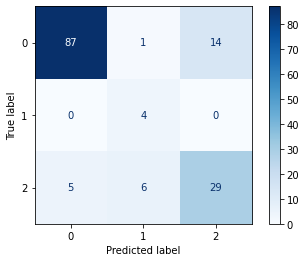

In [116]:
from sklearn.metrics import plot_confusion_matrix
print(X_test1.shape, y_test1.shape)
best_clf = results1.iloc[0].model
plot_confusion_matrix(best_clf,X_test1,y_test1, cmap=plt.cm.Blues)

We can see that the model fails to predict 15 records of the first class, 0 record of the second class and 11 records of the third class. It did quite well classifying the low priced houses, not so well for the others.

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

We will use the same method used in the classification task. We will use grid search, that will search for the best hyper paramaters by using the Root Mean Squared Error (RMSE) evaluation metric. After obtaining the best models, we test them in a the test set, that wasn't used by grid search. In the test set we used both the RMSE and the Mean Absolute Error (MAE) metrics.

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

if not path.exists('simple_regressors.pickle'):
    regressors = [
        LinearRegression ,
        Lasso,
        Ridge
    ]

    regressors_kwargs = [
        {"param_grid": {}},
        {'param_grid': {'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}},
        {'param_grid': {'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}},
    ]

    pipelines = [
        Pipeline([('scaler', StandardScaler())]),
        Pipeline([('scaler', StandardScaler())]),
        Pipeline([('scaler', StandardScaler())])
    ]

    results2,X_test2,y_test2_ = train_and_eval(df_x_reg, y_reg,df_x_reg_test, y_reg_test, regressors, regressors_kwargs,pipelines,scoring='neg_root_mean_squared_error', regression = True, save='simple_regressors.pickle')
    #export test data to pickle
    with open('simple_regressors_xtest.pickle', "wb") as fw: pickle.dump(X_test2, fw, pickle.HIGHEST_PROTOCOL)
    with open('simple_regressors_ytest.pickle', "wb") as fw: pickle.dump(y_test2_, fw, pickle.HIGHEST_PROTOCOL)
    
else: 
    results2 = pd.read_pickle('simple_regressors.pickle')
    X_test2 = pd.read_pickle('simple_regressors_xtest.pickle')
    y_test2 = pd.read_pickle('simple_regressors_ytest.pickle')
results2

,model,params,rmse_train_mean,rmse_train_std,mae_test,rmse_test
0,"(StandardScaler(), LinearRegression())","{""param_grid"": {}}",34690.820252,10176.908214,21683.133154,39534.917536
1,"(StandardScaler(), Lasso(alpha=75, random_stat...","{""param_grid"": {""alpha"": [0.05, 0.1, 0.3, 1, 3...",34618.831455,10143.497686,21717.375713,39575.697696
2,"(StandardScaler(), Ridge(alpha=75, random_stat...","{""param_grid"": {""alpha"": [0.05, 0.1, 0.3, 1, 3...",34402.067234,9974.088183,21620.330252,39800.899910


The best models had varying results for MAE and RMSE scores. The best for MAE score was the Ridge model, but the one with best RMSE score was the linear regression with a 39534 of RMSE.

## 4. Ensemble Learning

### Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)/regressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

#### Classifier

We will use the same function but this time for only one classifier with the best classifiers obtained in section 2.

In [123]:
from sklearn.ensemble import VotingClassifier

if not path.exists('vc_classifiers.pickle'):
    classifier = [VotingClassifier]

    cl1 = KNeighborsClassifier(n_neighbors=3, weights='distance')
    cl2 = LogisticRegression(C=10, tol=0.01, max_iter=500)
    cl3 = GaussianNB()


    classifiers_kwargs = [
            {'estimators': [('kn', cl1), ('lr', cl2), ('gnb', cl3)], 'voting': 'hard'}]

    pipelines = [
        Pipeline([('scaler', StandardScaler())])
    ]

    results_vc,_,_ = train_and_eval(df_x_clf, y_clf, df_x_clf_test, y_clf_test, classifier, classifiers_kwargs,pipelines,scoring= 'accuracy', regression = False, save='vc_classifiers.pickle')
else: results_vc = pd.read_pickle('vc_classifiers.pickle')
results_vc

,model,params,accuracy_train_mean,accuracy_train_std,accuracy_test,precision_test,recall_test
0,"VotingClassifier(estimators=[('kn',\n ...","{'estimators': [('kn', KNeighborsClassifier(n_...",0.965517,0.0,0.876712,0.876712,0.876712


#### Regressor

Then again, we use the same function, but now with the best regressors of section 3.

In [129]:
from sklearn.ensemble import VotingRegressor

if not path.exists('vc_regressors.pickle'):
    regressor = [VotingRegressor]

    re1 = LinearRegression()
    re2 = Lasso(alpha=75, random_state=42)
    re3 = Ridge(alpha=75, random_state=42)


    regressors_kwargs = [
            {'estimators': [('lr', re1), ('la', re2), ('ri', re3)]}]

    pipelines = [
        Pipeline([('scaler', StandardScaler())])
    ]

    results_vr,_,_ = train_and_eval(df_x_reg, y_reg,df_x_reg_test, y_reg_test,  regressor, regressors_kwargs,pipelines,scoring= 'neg_root_mean_squared_error', regression = True, save='vc_regressors.pickle')
else: results_vr = pd.read_pickle('vc_regressors.pickle')
results_vr

,model,params,rmse_train_mean,rmse_train_std,mae_test,rmse_test
0,"VotingRegressor(estimators=[('lr', LinearRegre...","{'estimators': [('lr', LinearRegression()), ('...",33429.573768,0.0,21574.016746,39579.004917


#### Conclusion

After using both of these ensemble methods for the best classifiers and regressors we have achieved very similar results as the best models, but not as good as the best models. Possibly using even more classifiers would provide even better results. We will check now what are the results with other ensemble methods.

### XGBoost & Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).
* Use [XGBoost](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn).

In [131]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

if not path.exists('ensemble_classifiers.pickle'):
    classifiers = [
        XGBRegressor,
        RandomForestRegressor
    ]
    
    classifiers_kwargs = [
        {'param_grid': {'objective': ["multi:softprob"], 'n_estimators': [5,10,15,20,50,100]}},
        {'param_grid': {'n_estimators':[10,50,100,200,300,400,500], 'criterion': ['gini', 'entropy']}},
    ]

    pipelines = [
        False,
        False
    ]

    results3,_,_ = train_and_eval(df_x_clf, y_clf, df_x_clf_test, y_clf_test, classifiers, classifiers_kwargs,pipelines,scoring= 'accuracy', regression = False, save='ensemble_classifiers.pickle')
else: results3 = pd.read_pickle('ensemble_classifiers.pickle')
results3

,model,params,accuracy_train_mean,accuracy_train_std,accuracy_test,precision_test,recall_test
0,"XGBClassifier(base_score=0.5, booster='gbtree'...","{""n_estimators"": 100, ""objective"": ""multi:soft...",0.963738,0.022487,0.938356,0.938356,0.938356
1,"(DecisionTreeClassifier(max_features='auto', r...","{""criterion"": ""gini"", ""n_estimators"": 200}",0.966642,0.022070,0.945205,0.945205,0.945205


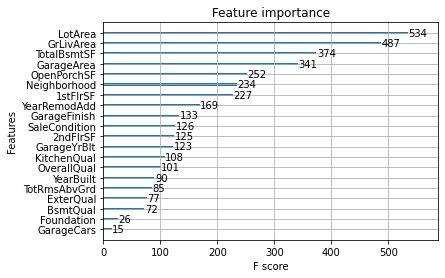

In [132]:
import xgboost as xgb
import graphviz

XGB_model = results3.iloc[0].model
xgb.plot_importance(XGB_model)

Interestingly we have gotten better results with both ensemble models than with any of the others normal classifiers, showing that these can be better choices for this problem.
From the last graph, we have also seen that LotArea was the feature with more importance, compared with what the RandomForestClassifier had given in the feature selection.

#### Regression

In [140]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

if not path.exists('ensemble_regressors.pickle'):
    classifiers = [
        XGBRegressor,
        RandomForestRegressor
    ]
    
    classifiers_kwargs = [
        {'param_grid': {'gamma': [0, 0.1, 0.3, 0.5], 'learning_rate': [0.01, 0.05, 0.1, 0.3], 'n_estimators': [100,200,300]}},
        {'param_grid': {'n_estimators':[10,50,100,200,300,400,500], 'criterion': ['mse', 'mae']}},
    ]

    pipelines = [
        Pipeline([('scaler', StandardScaler())]),
        Pipeline([('scaler', StandardScaler())])
    ]

    results3,_,_ = train_and_eval(df_x_reg, y_reg, df_x_reg_test, y_reg_test, classifiers, classifiers_kwargs,pipelines,scoring= 'neg_root_mean_squared_error', regression = True, save='ensemble_regressors.pickle')
else: results3 = pd.read_pickle('ensemble_regressors.pickle')
results3

,model,params,rmse_train_mean,rmse_train_std,mae_test,rmse_test
0,"(StandardScaler(), XGBRegressor(base_score=0.5...","{""estimator__gamma"": 0, ""estimator__learning_r...",27654.316959,4921.393833,14840.171581,26712.809489
1,"(StandardScaler(), (DecisionTreeRegressor(max_...","{""estimator__criterion"": ""mse"", ""estimator__n_...",28646.545172,5243.954168,16301.836910,28613.412484


Again, we had much better results with the ensemble regressors. The best one was with the XGBRegresor with an RMSE of 26712.

## Conclusions

This was a great project, where we could do a good amount of work on the data processing and model training and testing, exploring a total of **12** different algorithms, with dozens of GridSearch for finding the best hyperparameters for each of the algorithms.

Our best results in the end were achieved by the ensemble models, which are more a lot more complex than the simple models we had for the Classifier and Regression section.

It was a lot easier to have good results for the Classifier, but even for that model, the accuracy we had was due to most of the samples being with a low price category. Investigating ways to improve the F1 score of all classes is definitely something that could be done. Regression is always going to be more difficult, but the ensemble models have shown a great improvement in comparison with the simple models.



**References**

[1] https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

[2] https://blog.methodsconsultants.com/posts/be-aware-of-bias-in-rf-variable-importance-metrics/

[3] Jiawei Han, Micheline Kamber, Jian Pei: Data Mining Concepts and Techniques
(2011)

[4] Parteek Bhatia: Data Mining and Data Warehousing Principles and Pratical Techniques
(2019)

